# PROJECT 2 : TEAM 11

Members: Talia Tandler, SeungU Lyu

In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

http://www.worldometers.info/world-population/us-population/
US pop in 2017 = 324,459,463

https://www.cdc.gov/vaccines/imz-managers/coverage/childvaxview/data-reports/mmr/trend/index.html
MMR immunization rate in 2017 = 90.7%

https://www.acha.org/documents/Programs_Services/ConEd/Measles_Update_2015_Implications_for_the_College_Setting.pdfMMR 
Measles importatoin number = 33/year

https://wwwnc.cdc.gov/travel/yellowbook/2018/infectious-diseases-related-to-travel/measles-rubeola
Measles incubation period 11 days average, infectious period 2-4 days before rash to after rash.

https://www.researchgate.net/figure/Daily-average-number-of-contacts-per-person-in-age-group-j-The-average-number-of_fig2_228649013
Daily average number of contacts per person. 

https://academic.oup.com/jid/article/189/Supplement_1/S91/825077
1999 overall immunity for measles were expected to be 93% for US population.

https://www.statista.com/statistics/195943/birth-rate-in-the-united-states-since-1990/
Birth rate = 12.2/1000 per year = 0.0122 
Death rate = 8.4/1000 per year = 0.0084


In [23]:
pop = 1000  #population
init_im = 0.5    #initial immunity of the US population
beta = 0.9
gamma = 1/7      #US recovery rate from measles
sigma = 0.091     #US rate from exposure period of 11 days to infected
contact_num = beta/gamma

6.300000000000001

# What would be the impact of getting rid of the MMR vaccination in newborn babies over the course of 10 years?

Background/why we thought this was interesting
-Explanation of the disease: symptoms, contagious
- Reference the fake study where the guy said vaccinations are bad for your baby
    --WHAT IF PEOPLE BELIEVED HIM???
- MMR is very super infections and has high herd immunity so when you drop the vaccination rate, it drops the infection rate.

### Methodology

In order to creat this model, we:

1. Did background research on MMR vaccination and the measles diseases and found a set of constants we would implement in our model.
2. Put the variables into a state function.
3. Ran the simulation based on measles infections every day.
4. Expanded simuluation for a course of 10 years.
5. Implemented the idea of a measles outbreak to make the simulation more realistic.
6. Created graphs to visually represent our results.

In [24]:
def make_system (pop, init_im, beta, gamma, sigma):
    """Make a system object for the SCIR model
    
    pop: Total US population
    init_im: Initial Population Immunity
    gamm: recovery rate for infected people
    sigma: rate of incubation group moving to infectious group
    return: System object"""
    
    init = State(S = int(pop*(1 - init_im)), E = 0, I = 1, R = int(pop*init_im))
    init /= np.sum(init)
    #S: susceptible, E: exposed period, I: infected, R: recovered(immune to disease)
    
    t0 = 0
    t_end = 365 #number of days in 1 year
    
    return System(init = init,
                  beta = beta,
                  gamma = gamma,
                  sigma = sigma,
                  t0 = t0,
                  t_end = t_end,
                  init_im = init_im)

In [25]:
def update_func(state, time, system):
    """Update the SEIR model
    
    state: starting variables of SEIR
    t: time step
    system: includes alpha,beta,gamma,omega rates
    contact: current contact number for the state
    
    """
    
    unpack(system)
    
    s,e,i,r = state
            
    #current population
    total_pop = s+e+i+r
    
    #change rate for each status
    ds = (-beta*s*i)/total_pop #change in number of people susceptible
    de = ((beta*s*i)/total_pop) - sigma*e #change in number of people moving to exposed period
    di = sigma*e - gamma*i     #change in people moving to infectious period
    dr = gamma*i     #change in people recovered

    s += ds      #number of people susceptible
    e += de      #number of people exposed
    i += di      #number of people infected
    r += dr      #number of people recovered
    
    return State(S=s, E=e, I=i, R=r)

In [26]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    #creates timeframe to save daily states
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for time in linrange(t0, t_end):
        frame.row[time+1] = update_func(frame.row[time], time, system)
    
    return frame

In [27]:
def plot_results (S,E,I,R):
    
    plot(S, '--', label = 'Susceptible')
    plot(E, '-', label = 'Exposded')
    plot(I, '.', label = 'Infected')
    plot(R, ':', label = 'Recovered')
    decorate(xlabel='Time (days)',
            ylabel = 'Fraction of population')

In [28]:
system = make_system(pop, init_im, beta, gamma, sigma)
results = run_simulation(system, update_func)
results

,S,E,I,R
0,0.499500,0.000000e+00,9.990010e-04,0.499500
1,0.499051,4.491013e-04,8.562866e-04,0.499643
2,0.498667,7.928310e-04,7.748281e-04,0.499766
3,0.498319,1.068426e-03,7.362860e-04,0.499876
4,0.497989,1.301414e-03,7.283291e-04,0.499981
5,0.497662,1.509415e-03,7.427108e-04,0.500085
6,0.497330,1.704716e-03,7.739661e-04,0.500192
7,0.496983,1.896012e-03,8.185286e-04,0.500302
8,0.496617,2.089590e-03,8.741330e-04,0.500419
9,0.496227,2.290136e-03,9.394096e-04,0.500544


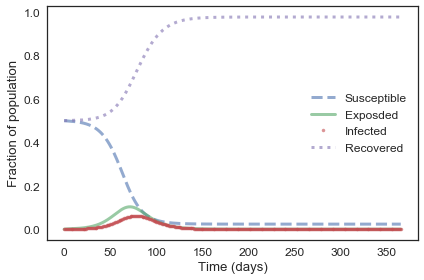

In [29]:
plot_results(results.S, results.E, results.I, results.R)

In [32]:
imax = max(results.I)

0.062195844690660675

In [33]:
def calc_highest_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame with columns S, I, R
    
    returns: fraction of population
    """
    return max(results.I)

In [34]:
def sweep_init_im(imun_rate_array):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for init_im in imun_rate_array:
        system = make_system(pop, init_im, beta, gamma, sigma)
        results = run_simulation(system, update_func)
        sweep[system.init_im] = calc_highest_infected(results)*pop
    return sweep

In [35]:
imun_rate_array = linspace(0, 1, 11)
sweep = sweep_init_im(imun_rate_array) 
sweep

,values
0.0,208.524561
0.1,177.862300
0.2,147.583541
0.3,117.990650
0.4,89.410198
0.5,62.195845
0.6,37.102832
0.7,15.954935
0.8,2.101866
0.9,1.000000


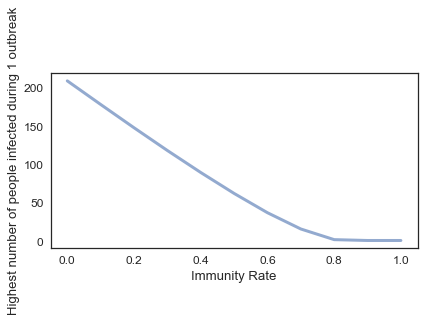

In [36]:
plot(sweep)
decorate(xlabel='Immunity Rate',
        ylabel = 'Highest number of people infected during 1 outbreak')

## Results

This model uses SEIR methodology to examine how measels would spread throughout a community of 1000 individuals with varying immunity rates. As the number of susceptible individuals decreases, the number of recovered individuals increases at an equal and opposite rate. The maximum fraction of the populate exposed to measles occurs at X days and the maximum number of infected individuals occurs at Y days. The time between these two points is when the fraction of susceptible individuals begins to decrease quickly and the recovered individuals increase quickly. It appears the measle outbreak ends at Z days as the entire population has moved into the recovery phase.


## Interpretation

As expected, as the immunity rate in the community increased, the highest number of people infected with measles during an outbreak decreased. Interestingly, the number of people infected appears to plateau at an 80% immunity rate. This result aligns with the concept of herd immunity as an indirect protection from a disease when a large percentage of a population becomes immune to the disease. In Figure 1 of our model, individuals are becoming immune to measles when they are in the recovery state and thus the oubreak is not prepetuated. In Figure 2, herd immunity is demonstrated as the number of individuals who become infected with measles decreases as the number of individuals who are immune to the disease increases.

Our model does have several limitations:
